# README Maker
> Complete README in this notebook and then convert this notebook to markdown. Delete every above the horizontal line:

In [4]:
import json
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
# Ensure inline display of matplotlib figures
%matplotlib inline

import pandas as pd
with open('config/filepaths.json') as f:
    FPATHS = json.load(f)
FPATHS['readme']

{'histogram-reviews-dist_png': 'images/01_histogram_reviews.png',
 'avg-reviews-by-year_png': 'images/02_avg_rating_by_year.png',
 'number-reviews-stars-by-year_png': 'images/03_count_stars_by_year.png',
 'ngrams-by-group_png': 'images/04_ngrams_by_group.png',
 'wordclouds-by-group_png': 'images/05_wordclouds.png'}

In [5]:
import joblib
df = joblib.load(FPATHS['data']['processed-nlp']['processed-reviews-with-target_joblib'])

In [6]:
from IPython.display import Markdown
with open(FPATHS['metadata']['product-information_md']) as f:
    print(f.read())


- Product Title:

***"Miracle Noodle Zero Carb, Gluten Free Shirataki Pasta, Spinach Angel Hair, 7-Ounce (Pack of 24)"***<p><img src='images/selected-products/miracle-noodle-2024.jpg' width=300px></p>
- Brand: Miracle Noodle
- Price: $59.76
- Ranked 119,683 in Grocery & Gourmet Food (2018)
- Categories:
    - Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki


In [7]:
# Commented Out on 06/25/24 due to error
fpath_model_results = FPATHS['results']['best-ml-clf_joblib']
results_dict = joblib.load(fpath_model_results)
results_dict.keys()

dict_keys(['model', 'train', 'test'])

To Do:
- Change your name and social media links below and remove code block syntax
- Uncomment any sections at the bottom that you wish to add back.

<hr style="color:red;">

# Amazon Reviews Analysis: Miracle Noodle Zero Carb Pasta

*Understanding Consumer Taste Preferences from Reviews Using Natural Language Processing*

- James M. Irving, Ph.D.

<blockquote>
    <ul>
  <li><a href="https://www.linkedin.com/in/james-irving-phd" rel="nofollow noreferrer">
    LinkedIn
  </a> </li>
  <li><a href="https://github.com/jirvingphd" rel="nofollow noreferrer">
    Github
  </a></li>
</ul>
</blockquote>

- Updated 06/27/24

## Overview

This project focuses on analyzing customer reviews for the "Miracle Noodle Zero Carb, Gluten Free Shirataki Pasta, Spinach Angel Hair" product sold on Amazon. Utilizing advanced Natural Language Processing (NLP) and Machine Learning techniques, this analysis aims to uncover patterns in customer sentiment and preferences, which are crucial for driving product improvements and enhancing customer satisfaction.

## Business Problem

In the competitive landscape of the grocery and gourmet food market, understanding consumer preferences and addressing their concerns is crucial for maintaining customer satisfaction and driving sales. The primary business problem we aim to address in this analysis is the significant proportion of negative reviews for the "Miracle Noodle Zero Carb, Gluten Free Shirataki Pasta, Spinach Angel Hair, 7-Ounce (Pack of 24)" product. Despite having a large number of positive reviews, the negative feedback highlights potential areas for improvement that could enhance the overall customer experience and product quality.

### Objectives of the Analysis

1. **Identify Key Themes in Customer Reviews**:
    - Utilize NLP techniques to uncover common themes and topics in both positive and negative reviews. Understanding these themes will help us identify what aspects of the product customers appreciate and what issues they frequently encounter.
2. **Analyze Sentiment Trends**:
    - Perform sentiment analysis to assess the overall emotional tone of the reviews. This analysis will reveal how customer sentiment correlates with star ratings and how it changes over time.
3. **Extract Actionable Insights**:
    - Based on the identified themes and sentiment trends, derive actionable insights that can inform product improvements and marketing strategies. The goal is to address customer concerns effectively and enhance the product features that customers value the most.
4. **Provide Data-Driven Recommendations**:
    - Offer specific, data-driven recommendations to the product team and stakeholders on how to improve the product and increase customer satisfaction. These recommendations will be grounded in the analysis of the reviews and will target the most critical areas for enhancement.

### How Insights Will Be Used

1. **Improve Product Quality**:
    - Address specific issues mentioned in negative reviews, such as texture, smell, and ease of preparation. Implementing these improvements can reduce the proportion of negative reviews and enhance overall customer satisfaction.
2. **Enhance Marketing Strategies**:
    - Highlight the positive aspects frequently mentioned in high-rating reviews, such as health benefits and flavor, in marketing materials. This can attract more customers who prioritize these features.
3. **Guide Product Development**:
    - Use the detailed feedback from reviews to guide future product development and innovation. Understanding customer preferences can help in designing new products or variants that better meet customer needs.
4. **Monitor Customer Sentiment**:
    - Continuously monitor customer sentiment through ongoing analysis of new reviews. This will help in quickly identifying emerging issues and addressing them proactively.

By achieving these objectives, we aim to transform customer feedback into actionable strategies that drive product improvement and enhance customer loyalty.



## Introduction to Natural Language Processing (NLP)

Natural Language Processing (NLP) is a dynamic subfield of artificial intelligence (AI) concerned with the interaction between computers and human language. It involves designing and applying algorithms and models that enable computers to understand, interpret, and generate human language in meaningful and useful ways.

### Why NLP?

Utilizing NLP to analyze customer reviews is invaluable because it allows us to:

1. **Automate Text Analysis**: Manually sifting through millions of reviews is not feasible. NLP facilitates large-scale, automated text analysis.
2. **Discover Hidden Insights**: NLP methods can detect subtle patterns, trends, and sentiments, providing insights that are not readily apparent through manual examination.
3. **Enhance Decision Making**: By deepening our understanding of customer sentiments and preferences, NLP aids in making informed decisions to improve product offerings.

### Key NLP Techniques Utilized in This Project

1. **Text Preprocessing**:
    - **Tokenization**: Splitting text into meaningful elements like words or sentences.
    - **Lemmatization**: Condensing words to their base or dictionary form.
    - **Stopword Removal**: Eliminating common words that add no significant value to text interpretation.
2. **Sentiment Analysis**:
    - **VADER (Valence Aware Dictionary and sEntiment Reasoner)**: Tailored for social media analysis, this tool assesses texts' emotional tone, providing scores across positive, negative, and neutral sentiments.
3. **Topic Modeling**:
    - **Latent Dirichlet Allocation (LDA)**: This technique identifies prevalent topics within a large corpus by modeling each document as a mixture of various topics and each topic as a combination of words.

### Benefits of NLP in Review Analysis

1. **Understanding Sentiments**: Ascertain the emotional undertones of reviews, which reflect consumers' feelings toward products.
2. **Identifying Themes**: Uncover major themes in discussions, helping pinpoint what consumers like or dislike.
3. **Driving Actionable Insights**: Analyze reviews on a large scale to identify areas for product improvement and meet customer demands more effectively.

## The Data

### Data Preparation and Filtering

Effective data preparation and filtering are critical steps in any data analysis project, particularly when working with large datasets. In this project, we use a subset of the Amazon Reviews dataset to analyze consumer preferences in the Grocery and Gourmet Food category. This section outlines the steps taken to prepare and filter the data for meaningful analysis.

#### Data Overview

- **Dataset**: Amazon Reviews (Jianmo et al., 2019)
- **Subset**: Groceries & Gourmet Food category
- **Total Reviews**: 5,074,160
- **Product Metadata**: 287,209 Gourmet products

Due to the large size of the raw data files, they were split into multiple CSV files to fit within the project repository constraints.

#### Review Filtering

1. **Filtering Products**:
    - The metadata was filtered to retain only those products categorized under the `main_cat` of Grocery. This step ensures that our analysis focuses solely on relevant items within the targeted category.

1. **Verified Purchases**:
    - Only reviews that were verified purchases were kept. This filtering step helps ensure the authenticity and reliability of the reviews, as verified purchase reviews are more likely to be genuine reflections of customer experiences.

#### Product Selection Criteria

In the absence of a direct stakeholder, a systematic approach was adopted to identify a suitable product for analysis. The goal was to select a product with substantial feedback, both positive and negative, to provide a balanced perspective.

1. **Common Products**:
    - Products with a significant number of both 1-star and 5-star reviews were shortlisted.
2. **Ranking by Reviews**:
    - Each brand/product was ranked based on the number of 1-star and 5-star reviews. This ranking helped identify products that generated strong opinions, either positive or negative.
3. **Final Selection**:
    - The final product was chosen based on the largest proportion of 1-star reviews. This selection aims to delve deeper into critical feedback, uncovering areas of dissatisfaction that can provide valuable insights for product improvement.



### Selected Product

- **Product Title**: ***"Miracle Noodle Zero Carb, Gluten Free Shirataki Pasta, Spinach Angel Hair, 7-Ounce (Pack of 24)"***
- **Brand**: Miracle Noodle
- **Price**: $59.76
- **Rank**: 119,683 in Grocery & Gourmet Food (2018)
- **Categories**: Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki

By carefully preparing and filtering the data, we ensure that our analysis is based on clean, relevant, and high-quality data. This thorough preparation enables us to derive meaningful insights that can guide strategic decisions and product enhancements. This careful selection ensures that our analysis is grounded in relevant and insightful data, enabling us to derive meaningful conclusions that can significantly impact product strategy and consumer satisfaction.


#### Overall Rating Distribution for Selected Product
Miracle Noodle has a substantial number of 5-star reviews. However, a significant portion of reviews are also 1-star, highlighting potential issues with the product. Given the multi-year span of this dataset, it is crucial to examine trends in the average rating over time.

![Overall Rating Distribution](images/01_histogram_reviews.png)

#### Reviews Over Time
The overall average customer rating has decreased year-over-year.

![Average Rating by Year](images/02_avg_rating_by_year.png)

Additionally, the proportion of 1-star reviews has increased, while 5-star reviews have decreased.

![Count of Star Ratings by Year](images/03_count_stars_by_year.png)

We will use the text from the customer reviews to provide insights into customer preferences and offer recommendations on how to improve the product.


#### Reference

**Justifying recommendations using distantly-labeled reviews and fined-grained aspects**
Jianmo Ni, Jiacheng Li, Julian McAuley
*Empirical Methods in Natural Language Processing (EMNLP)*, 2019


## Methods and Techniques

In this project, we employed various natural language processing (NLP) methods and techniques to analyze customer reviews and extract meaningful insights. Below is a brief introduction to each method used, along with an explanation of the rationale behind choosing these methods and their relevance to the analysis.

### Text Preprocessing

Before applying any advanced NLP techniques, we performed several preprocessing steps to clean and prepare the text data. These steps include:

- **Tokenization**: Breaking down the text into individual words or tokens. This is the first step in text processing, making the data suitable for further analysis.
- **Lemmatization**: Reducing words to their base or root form (e.g., "running" to "run"). This helps in normalizing the text and reducing the dimensionality of the data.
- **Stopword Removal**: Removing common words that do not add significant meaning to the text (e.g., "and", "the"). This step helps in focusing on the more meaningful words in the text.

These preprocessing steps are crucial as they ensure the text data is clean and structured, which improves the performance and accuracy of the subsequent NLP techniques.

### Sentiment Analysis with VADER

**VADER (Valence Aware Dictionary and sEntiment Reasoner)** is a tool specifically designed for sentiment analysis in social media texts. It is effective for analyzing the sentiment of reviews, news articles, and other user-generated content. VADER assigns a sentiment score to each

 piece of text based on a combination of lexical features and grammatical rules.

- **Positive, Negative, and Neutral Scores**: VADER calculates individual scores for positive, negative, and neutral sentiments within a text.
- **Compound Score**: A normalized, weighted composite score that summarizes the overall sentiment of the text. The compound score ranges from -1 (most extreme negative) to +1 (most extreme positive).

**Rationale for Choosing VADER**:

- **Handles Informal Language**: VADER is well-suited for analyzing informal language, emoticons, slang, and punctuation, which are common in customer reviews.
- **Ease of Use**: It is simple to implement and provides clear sentiment scores, making it efficient for large-scale sentiment analysis.

### Topic Modeling with LDA

**Latent Dirichlet Allocation (LDA)** is a powerful unsupervised machine learning technique used for topic modeling. LDA helps in discovering the underlying topics present within a large collection of documents by identifying patterns in word usage.

- **Identifying Themes**: LDA helps in automatically discovering the hidden thematic structure in a corpus of text. This is particularly useful for understanding large datasets of textual information without manually reading through every document.
- **Dimensionality Reduction**: By representing documents as mixtures of topics, LDA effectively reduces the dimensionality of text data, making it easier to analyze and visualize.

**Rationale for Choosing LDA**:

- **Uncovering Hidden Topics**: LDA is effective at identifying the main themes and topics within a large set of reviews, providing insights into what customers frequently discuss.
- **Improving Decision Making**: Understanding the main topics in customer reviews can provide valuable insights for decision-making, trend analysis, and strategic planning.


## Exploratory Data Analysis



### Class Balance (Binary Classification)

The binary classification had a relatively even class balance.

<img src="eda/class-balance.png" width=60%>

#### WordClouds (Bigrams)
Preliminary review of the word clouds provides some hints as to what may underlie the 1-star reviews, although many of the same phrases appear for both groups. Quantifying trigrams or quadgrams may be a better approach to unveil the differences.


<img src='images/05_wordclouds.png' width=90%>




#### Most Frequent Trigrams
We can see that there are complaints about the noodles feeling like chewing on rubber bands. There's also a clear mention of a smell that may or may not go away (as it appears in both groups). Further exploration of the texts via Scattertext (see app at the top of README) uncovers alternative opinions on how easy it is to address the smell.

<img src="images/04_ngrams_by_group.png" width=90%>


### Sentiment Analysis
The sentiment analysis reveals a clear correlation between the star ratings and the sentiment scores. Higher star ratings correspond to more positive sentiment, while lower star ratings show more negative sentiment. Text preprocessing significantly impacts sentiment scores, highlighting the importance of careful text preparation in sentiment analysis.

#### Introduction to Sentiment Analysis with VADER



Sentiment analysis is a powerful technique in natural language processing (NLP) used to determine the emotional tone behind a body of text. It is widely applied to understand opinions, attitudes, and emotions expressed in reviews, social media, and other textual data. In this section, we will focus on sentiment analysis using the VADER (Valence Aware Dictionary and sEntiment Reasoner) tool.

##### Why VADER?

1. **Specifically Designed for Social Media Text**: VADER is particularly effective for texts found in social media, news articles, and online reviews, making it a great fit for our analysis.
2. **Handles Emoticons, Slang, and Punctuation**: Unlike many traditional sentiment analysis tools, VADER can accurately interpret emoticons, slang, and punctuation, which are often prevalent in user-generated content.
3. **Easy to Use**: VADER is simple to implement and provides clear sentiment scores, allowing for quick and efficient sentiment analysis.

##### How VADER Works

VADER assigns a sentiment score to a piece of text based on a combination of lexical features and grammatical rules. The main components include:

1. **Positive, Negative, and Neutral Scores**: VADER calculates individual scores for positive, negative, and neutral sentiments within a text.
2. **Compound Score**: A normalized, weighted composite score that summarizes the overall sentiment of the text. The compound score ranges from -1 (most extreme negative) to +1 (most extreme positive).


<img src="eda/sentiment-rating-strip.png" width=60%>

The sentiment analysis reveals a clear correlation between the star ratings and the sentiment scores. Higher star ratings correspond to more positive sentiment, while lower star ratings show more negative sentiment. Text preprocessing significantly impacts sentiment scores, highlighting the importance of careful text preparation in sentiment analysis.


#### VADER Sentiment Analysis Visualization vs. Preprocessing


Text preprocessing significantly impacts sentiment scores, highlighting the importance of careful text preparation in sentiment analysis.

- **Sentiment Distribution**: A bar chart or strip plot showing the distribution of positive, negative, and neutral sentiment scores across the reviews. This helps in understanding the overall emotional tone of the reviews.
- Its intereesting that the lemmatized text shows reduced neutral sentiment and increased positive sentiment, underscoring how vital text preprocessing choices are to the quality of the results.

<img src="eda/sentiment-groups-bar.png" width=80%>



- **Comparion of Average Compound Sentiment Score vs. Preprocessing Options**
- Its also interesting to see here that the low-rating reviews lose their overeall negatiivity following lemmatization, further highlighting the consequences of text preprocessing decisions.



<img src='eda/sentiment-overall-bar.png' width=60%>



#### LDA Topic Modeling

LDA topic modeling has identified distinct themes within the reviews. High-rating reviews focus on health benefits and positive sensory experiences, while low-rating reviews highlight texture and smell issues. These insights help in understanding the primary factors that influence customer satisfaction and dissatisfaction.






#### LDA Topic Modeling Visualizations

- **Intertopic Distance Map**: A multidimensional scaling plot showing the relationships between topics. Each circle represents a topic, with the size indicating prevalence and the distance indicating similarity between topics. Closer topics share more similar themes.





In [9]:
display(Markdown(f"<img src=\"{FPATHS['eda']['lda']['lda-viz-screenshot-high_png']}\">"))


<img src="eda/lda-viz-screenshot-high.png">


- **Top Terms per Topic**: A table displaying the most relevant terms for each topic. This visualization helps in understanding the key words that define each topic and provides insights into the themes discussed in the reviews.


In [ ]:
### TEMP: Loading LDA markdown
with open(FPATHS['eda']['lda']['lda-topics-high_md']) as f:
    lda_topics_high = f.read()

# lda_viz_high=f"<img src=\"{FPATHS['eda']['lda']['lda-viz-screenshot-high_png']}\">"    

# Combine into 1 mardkwn string for high ratings
lda_results_high = "### LDA Results for High Ratings\n\n"
lda_results_high += lda_topics_high
# lda_results_high += lda_viz_high
display(Markdown(lda_results_high))


### LDA Results for High Ratings

#### High Rating Reviews Topics:
|   Topic | group               | Word 1          | Word 2          | Word 3         | Word 4         | Word 5           | Word 6         | Word 7         | Word 8           | Word 9           | Word 10          |
|--------:|:--------------------|:----------------|:----------------|:---------------|:---------------|:-----------------|:---------------|:---------------|:-----------------|:-----------------|:-----------------|
|       1 | High Rating Reviews | rice (0.0360)   | noodle (0.0330) | pasta (0.0220) | like (0.0200)  | carb (0.0190)    | rinse (0.0140) | good (0.0120)  | dish (0.0120)    | sauce (0.0120)   | love (0.0110)    |
|       2 | High Rating Reviews | noodle (0.0390) | like (0.0290)   | pasta (0.0180) | smell (0.0170) | great (0.0150)   | sauce (0.0140) | taste (0.0140) | calorie (0.0130) | texture (0.0130) | rinse (0.0120)   |
|       3 | High Rating Reviews | noodle (0.0240) | love (0.0220)   | sauce (0.0180) | pasta (0.0170) | calorie (0.0140) | free (0.0120)  | taste (0.0110) | flavor (0.0110)  | minute (0.0110)  | smell (0.0100)   |
|       4 | High Rating Reviews | great (0.0740)  | star (0.0620)   | love (0.0400)  | carb (0.0380)  | noodle (0.0320)  | good (0.0310)  | pasta (0.0300) | product (0.0260) | taste (0.0230)   | diet (0.0160)    |
|       5 | High Rating Reviews | noodle (0.0530) | smell (0.0190)  | rinse (0.0180) | like (0.0170)  | taste (0.0150)   | good (0.0140)  | sauce (0.0140) | water (0.0120)   | pasta (0.0110)   | texture (0.0110) |

- Topic 1
  - Descriptive Label: Carb-Rich Dishes
  - Top Words: rice, noodle, pasta, like, carb, rinse, good, dish, sauce, love
  - Short Insight: This topic focuses on high-carb dishes such as rice, noodles, and pasta, with positive sentiments like "good" and "love" indicating high satisfaction.

- Topic 2
  - Descriptive Label: Flavor and Texture
  - Top Words: noodle, like, pasta, smell, great, sauce, taste, calorie, texture, rinse
  - Short Insight: This topic highlights the importance of flavor and texture in high-rated reviews, with frequent mentions of noodles, pasta, and sauce, along with positive descriptors like "great" and "taste."

- Topic 3
  - Descriptive Label: Low-Calorie Favorites
  - Top Words: noodle, love, sauce, pasta, calorie, free, taste, flavor, minute, smell
  - Short Insight: This topic centers around low-calorie dishes that are well-loved, with frequent mentions of noodles, pasta, and sauce, and positive sentiments like "love" and "flavor."

- Topic 4
  - Descriptive Label: Overall Satisfaction
  - Top Words: great, star, love, carb, noodle, good, pasta, product, taste, diet
  - Short Insight: This topic reflects overall satisfaction with products, emphasizing high ratings ("star"), love for the product, and mentions of carbs, noodles, and pasta.

- Topic 5
  - Descriptive Label: Sensory Experience
  - Top Words: noodle, smell, rinse, like, taste, good, sauce, water, pasta, texture
  - Short Insight: This topic focuses on the sensory experience of food, with frequent mentions of smell, taste, and texture, particularly in relation to noodles and pasta.

In [13]:


lda_viz_low=f"<img src=\"{FPATHS['eda']['lda']['lda-viz-screenshot-low_png']}\">"    
display(Markdown(lda_viz_low))
### TEMP: Loading LDA markdown
with open(FPATHS['eda']['lda']['lda-topics-low_md']) as f:
    lda_topics_low = f.read()
    
# Combine into 1 mardkwn string for low ratings
lda_results_low = "### LDA Results for Low Ratings\n\n"
lda_results_low += lda_topics_low
# lda_results_low += lda_viz_low
display(Markdown(lda_results_low))


<img src="eda/lda-viz-screenshot-low.png">

### LDA Results for Low Ratings

### Low Rating Reviews Topics:
|   Topic | group              | Word 1          | Word 2           | Word 3           | Word 4           | Word 5         | Word 6           | Word 7              | Word 8           | Word 9            | Word 10        |
|--------:|:-------------------|:----------------|:-----------------|:-----------------|:-----------------|:---------------|:-----------------|:--------------------|:-----------------|:------------------|:---------------|
|       1 | Low Rating Reviews | noodle (0.0220) | taste (0.0190)   | time (0.0180)    | like (0.0180)    | eat (0.0100)   | good (0.0100)    | cook (0.0100)       | slimy (0.0090)   | flavor (0.0090)   | want (0.0090)  |
|       2 | Low Rating Reviews | like (0.0560)   | texture (0.0330) | noodle (0.0240)  | rice (0.0190)    | smell (0.0180) | rubber (0.0180)  | taste (0.0110)      | weird (0.0110)   | eat (0.0110)      | cook (0.0100)  |
|       3 | Low Rating Reviews | smell (0.0560)  | like (0.0520)    | texture (0.0420) | taste (0.0400)   | Star (0.0330)  | fish (0.0280)    | noodle (0.0200)     | product (0.0180) | horrible (0.0130) | good (0.0110)  |
|       4 | Low Rating Reviews | noodle (0.0330) | like (0.0320)    | texture (0.0250) | taste (0.0190)   | gross (0.0160) | star (0.0130)    | disgusting (0.0130) | pasta (0.0120)   | try (0.0120)      | good (0.0120)  |
|       5 | Low Rating Reviews | taste (0.0350)  | noodle (0.0310)  | like (0.0300)    | package (0.0130) | try (0.0130)   | product (0.0120) | texture (0.0120)    | smell (0.0120)   | rice (0.0100)     | order (0.0100) |

- Topic 1
  - Descriptive Label: Unpleasant Noodle Experience
  - Top Words: noodle, taste, time, like, eat, good, cook, slimy, flavor, want
  - Short Insight: Reviews in this topic highlight dissatisfaction with the taste and texture of noodles, often described as slimy and lacking in flavor.

- Topic 2
  - Descriptive Label: Texture and Smell Issues
  - Top Words: like, texture, noodle, rice, smell, rubber, taste, weird, eat, cook
  - Short Insight: This topic focuses on negative feedback regarding the texture and smell of the product, with some reviewers comparing it to rubber and describing it as weird.

- Topic 3
  - Descriptive Label: Strong Odor and Poor Taste
  - Top Words: smell, like, texture, taste, Star, fish, noodle, product, horrible, good
  - Short Insight: Reviews in this topic emphasize a strong, unpleasant odor and poor taste, often mentioning a fishy smell and describing the product as horrible.

- Topic 4
  - Descriptive Label: Disgusting Noodle Texture
  - Top Words: noodle, like, texture, taste, gross, star, disgusting, pasta, try, good
  - Short Insight: This topic captures reviews that find the noodle texture disgusting and gross, with some reviewers expressing regret over trying the product.

- Topic 5
  - Descriptive Label: General Disappointment
  - Top Words: taste, noodle, like, package, try, product, texture, smell, rice, order
  - Short Insight: This topic reflects a general sense of disappointment with the product, mentioning issues with taste, texture, and packaging, and expressing dissatisfaction with the overall experience.

## Modeling Results

### Machine Learning Text Classification
Several machine learning models were developed and evaluated to classify the Amazon reviews into high and low sentiment categories. The models used include:

- **Dummy Classifier**: A baseline model for comparison.
- **Naive Bayes**: A probabilistic classifier.
- **Logistic Regression**: A linear model for binary classification.
- **Random Forest**: An ensemble model using decision trees.
- **Support Vector Classifier (SVC)**: A linear SVM model.





#### Best Model
The best-performing model was the Logistic Regression model using Tfidf Vectorization for preprocessing. Below are the classification metrics for the training and test data.



In [ ]:
from sklearn.utils import estimator_html_repr
from IPython.display import HTML
diagram = results_dict['model']
diagram

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegressionCV(max_iter=200))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1376
           1       1.00      1.00      1.00      1102

    accuracy                           1.00      2478
   macro avg       1.00      1.00      1.00      2478
weighted avg       1.00      1.00      1.00      2478





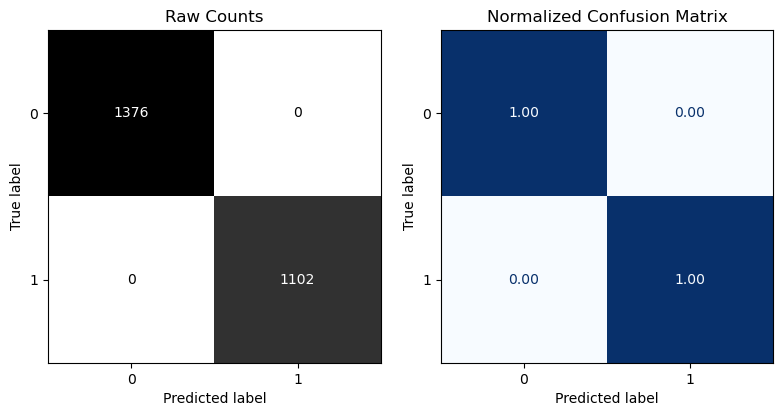

In [ ]:
print(results_dict['train']['classification_report'])
fig = results_dict['train']['confusion_matrix']
fig

----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       492
           1       0.95      0.93      0.94       335

    accuracy                           0.96       827
   macro avg       0.96      0.95      0.95       827
weighted avg       0.96      0.96      0.96       827





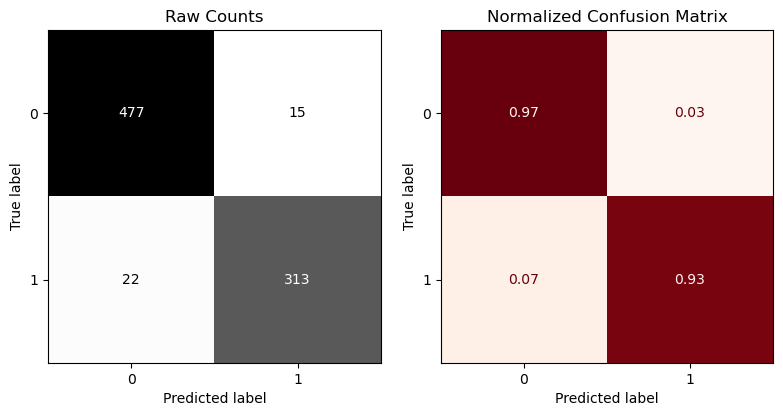

In [ ]:
print(results_dict['test']['classification_report'])
fig = results_dict['test']['confusion_matrix']
display(fig)

## Final Conclusion

The analysis of the Amazon reviews for the "Miracle Noodle Zero Carb, Gluten Free Shirataki Pasta, Spinach Angel Hair" product has provided comprehensive insights into customer preferences, sentiments, and common issues. By leveraging natural language processing techniques such as sentiment analysis with VADER and topic modeling with LDA, we have been able to identify key themes and sentiments expressed in both high and low-rating reviews.

### Key Insights:

1. **Positive Aspects**:
    - High-rating reviews frequently highlight the health benefits, flavor, and texture of the product.
    - Customers appreciate the low-calorie content and the ease of incorporating the noodles into various dishes.

2. **Negative Aspects**:
    - Low-rating reviews often mention issues with the texture, specifically describing the noodles as rubbery or slimy.
    - There are frequent complaints about the unpleasant smell upon opening the package.
    - Some customers find the preparation process challenging and not user-friendly.

3. **Sentiment Analysis**:
    - The sentiment analysis reveals a clear correlation between the star ratings and the sentiment scores. Higher star ratings correspond to more positive sentiment, while lower star ratings show more negative sentiment.
    - Text preprocessing significantly impacts sentiment scores, highlighting the importance of careful text preparation in sentiment analysis.

4. **Topic Modeling**:
    - LDA topic modeling has identified distinct themes within the reviews. High-rating reviews focus on health benefits and positive sensory experiences, while low-rating reviews highlight texture and smell issues.
    - These insights help in understanding the primary factors that influence customer satisfaction and dissatisfaction.

### Recommendations:

Based on the insights gained from the analysis, the following recommendations are proposed to improve the product and enhance customer satisfaction:

1. **Improve Texture**: Reformulate the product to address the rubbery texture, making it more similar to traditional noodles.
2. **Enhance Absorption**: Improve the noodles’ ability to absorb cooking sauces to make them more versatile and flavorful.
3. **Address Smell**: Explore ways to minimize any unpleasant odors upon opening the package.
4. **Simplify Preparation**: Provide clearer cooking instructions and consider offering pre-cooked options.
5. **Highlight Health Benefits**: Emphasize the low-calorie and healthy aspects in marketing materials to attract health-conscious customers.

By implementing these recommendations, the product can better meet customer expectations, reduce negative feedback, and reinforce positive aspects that attract loyal customers.


## Limitations & Next Steps

- Apply HuggingFace sentiment classification pipelines.
- Return to deep NLP modeling.
- Add sentiment analysis and LDA topic modeling to Streamlit app.




___


## Companion Streamlit Dashboard

Explore the interactive visualizations and analysis results through the Streamlit dashboard: [Amazon Reviews NLP Analysis & Predictions](https://amazon-reviews-nlp-analysis-predictions.streamlit.app/)


- [https://amazon-reviews-nlp-analysis-predictions.streamlit.app/](https://amazon-reviews-nlp-analysis-predictions.streamlit.app/)


<img src="images/streamlit-app-preview.png" width=1000>

___

___

# APPENDIX


By interpreting these visualizations, we can gain a deeper understanding of the sentiment and themes present in the reviews, guiding us to make data-driven recommendations for product improvement and customer satisfaction enhancement.

In [29]:
fpath = FPATHS['eda']['sentiment']['sentiment-rating-strip_png']
print(fpath)

eda/sentiment-rating-strip.png


In [30]:
FPATHS['eda']['sentiment']

{'sentiment-vs_overall_png': 'eda/sentiment-vs-overall.png',
 'sentiment-groups-bar_png': 'eda/sentiment-groups-bar.png',
 'sentiment-overall-bar_png': 'eda/sentiment-overall-bar.png',
 'sentiment-rating-strip_png': 'eda/sentiment-rating-strip.png'}

### LDA Topic Modeling


Latent Dirichlet Allocation (LDA) is a powerful unsupervised machine learning technique commonly used for topic modeling in natural language processing (NLP). This method helps uncover the underlying topics present within a large collection of documents by identifying patterns in the word usage. 

#### Why LDA?

1. **Identifying Themes**: LDA helps in automatically discovering the hidden thematic structure in a corpus of text. This can be particularly useful for understanding large datasets of textual information without having to manually read through every document.
2. **Dimensionality Reduction**: By representing documents as mixtures of topics, LDA effectively reduces the dimensionality of text data, making it easier to analyze and visualize.
3. **Informing Decision Making**: Understanding the main topics in customer reviews, articles, or any other textual data can provide valuable insights for decision-making, trend analysis, and strategic planning.

#### How LDA Works

LDA assumes that each document is a mixture of several topics, and each topic is a mixture of words. The goal is to infer these mixtures from the observed data (i.e., the words in the documents). The key steps involved in applying LDA are:

1. **Tokenization**: Breaking down the text into individual words or tokens.
2. **Preprocessing**: Cleaning the text data by removing stop words, punctuation, and applying techniques like lemmatization.
3. **Modeling**: Using the LDA algorithm to discover the latent topics in the text.
4. **Visualization**: Interpreting the results by visualizing the topics and their most relevant terms.

In this section, we will apply LDA topic modeling to our dataset of reviews. This involves the following steps:

1. **Preprocessing the Text Data**: We will start by cleaning and preparing the text data for analysis.
2. **Building the LDA Model**: Using the preprocessed data, we will build an LDA model to uncover the latent topics.
3. **Visualizing the Topics**: Finally, we will use interactive visualizations to explore and interpret the discovered topics.

By the end of this section, you will have a clear understanding of the main themes present in the reviews and how they contribute to the overall structure of the dataset. This will provide valuable insights that can inform future analysis and decision-making.

In [31]:
FPATHS['eda']['lda']

{'lda-topics-high_md': 'eda/lda-topics-high.md',
 'lda-topics-low_md': 'eda/lda-topics-low.md',
 'lda-topics-high_html': 'eda/lda-topics-high.html',
 'lda-topics-low_html': 'eda/lda-topics-low.html',
 'lda-topics-high_csv': 'eda/lda-topics-high.csv',
 'lda-topics-low_csv': 'eda/lda-topics-low.csv',
 'recommendations-products_md': 'eda/lda-recommendations-products.md',
 'lda-viz-instructions_md': 'eda/lda-viz-instructions.md',
 'lda-viz-screenshot-high_png': 'eda/lda-viz-screenshot-high.png',
 'lda-viz-screenshot-low_png': 'eda/lda-viz-screenshot-low.png'}

In [32]:
### TEMP: Loading LDA markdown
with open(FPATHS['eda']['lda']['lda-topics-high_md']) as f:
    lda_topics_high = f.read()

lda_viz_high=f"<img src=\"{FPATHS['eda']['lda']['lda-viz-screenshot-high_png']}\">"    

# Combine into 1 mardkwn string for high ratings
lda_results_high = "### LDA Results for High Ratings\n\n"
lda_results_high += lda_topics_high
lda_results_high += lda_viz_high
display(Markdown(lda_results_high))


### LDA Results for High Ratings

#### High Rating Reviews Topics:
|   Topic | group               | Word 1          | Word 2          | Word 3         | Word 4         | Word 5           | Word 6         | Word 7         | Word 8           | Word 9           | Word 10          |
|--------:|:--------------------|:----------------|:----------------|:---------------|:---------------|:-----------------|:---------------|:---------------|:-----------------|:-----------------|:-----------------|
|       1 | High Rating Reviews | rice (0.0360)   | noodle (0.0330) | pasta (0.0220) | like (0.0200)  | carb (0.0190)    | rinse (0.0140) | good (0.0120)  | dish (0.0120)    | sauce (0.0120)   | love (0.0110)    |
|       2 | High Rating Reviews | noodle (0.0390) | like (0.0290)   | pasta (0.0180) | smell (0.0170) | great (0.0150)   | sauce (0.0140) | taste (0.0140) | calorie (0.0130) | texture (0.0130) | rinse (0.0120)   |
|       3 | High Rating Reviews | noodle (0.0240) | love (0.0220)   | sauce (0.0180) | pasta (0.0170) | calorie (0.0140) | free (0.0120)  | taste (0.0110) | flavor (0.0110)  | minute (0.0110)  | smell (0.0100)   |
|       4 | High Rating Reviews | great (0.0740)  | star (0.0620)   | love (0.0400)  | carb (0.0380)  | noodle (0.0320)  | good (0.0310)  | pasta (0.0300) | product (0.0260) | taste (0.0230)   | diet (0.0160)    |
|       5 | High Rating Reviews | noodle (0.0530) | smell (0.0190)  | rinse (0.0180) | like (0.0170)  | taste (0.0150)   | good (0.0140)  | sauce (0.0140) | water (0.0120)   | pasta (0.0110)   | texture (0.0110) |

- Topic 1
  - Descriptive Label: Carb-Rich Dishes
  - Top Words: rice, noodle, pasta, like, carb, rinse, good, dish, sauce, love
  - Short Insight: This topic focuses on high-carb dishes such as rice, noodles, and pasta, with positive sentiments like "good" and "love" indicating high satisfaction.

- Topic 2
  - Descriptive Label: Flavor and Texture
  - Top Words: noodle, like, pasta, smell, great, sauce, taste, calorie, texture, rinse
  - Short Insight: This topic highlights the importance of flavor and texture in high-rated reviews, with frequent mentions of noodles, pasta, and sauce, along with positive descriptors like "great" and "taste."

- Topic 3
  - Descriptive Label: Low-Calorie Favorites
  - Top Words: noodle, love, sauce, pasta, calorie, free, taste, flavor, minute, smell
  - Short Insight: This topic centers around low-calorie dishes that are well-loved, with frequent mentions of noodles, pasta, and sauce, and positive sentiments like "love" and "flavor."

- Topic 4
  - Descriptive Label: Overall Satisfaction
  - Top Words: great, star, love, carb, noodle, good, pasta, product, taste, diet
  - Short Insight: This topic reflects overall satisfaction with products, emphasizing high ratings ("star"), love for the product, and mentions of carbs, noodles, and pasta.

- Topic 5
  - Descriptive Label: Sensory Experience
  - Top Words: noodle, smell, rinse, like, taste, good, sauce, water, pasta, texture
  - Short Insight: This topic focuses on the sensory experience of food, with frequent mentions of smell, taste, and texture, particularly in relation to noodles and pasta.<img src="eda/lda-viz-screenshot-high.png">

In [33]:
### TEMP: Loading LDA markdown
with open(FPATHS['eda']['lda']['lda-topics-low_md']) as f:
    lda_topics_low = f.read()

lda_viz_low=f"<img src=\"{FPATHS['eda']['lda']['lda-viz-screenshot-low_png']}\">"    

# Combine into 1 mardkwn string for low ratings
lda_results_low = "### LDA Results for Low Ratings\n\n"
lda_results_low += lda_topics_low
lda_results_low += lda_viz_low
display(Markdown(lda_results_low))


### LDA Results for Low Ratings

### Low Rating Reviews Topics:
|   Topic | group              | Word 1          | Word 2           | Word 3           | Word 4           | Word 5         | Word 6           | Word 7              | Word 8           | Word 9            | Word 10        |
|--------:|:-------------------|:----------------|:-----------------|:-----------------|:-----------------|:---------------|:-----------------|:--------------------|:-----------------|:------------------|:---------------|
|       1 | Low Rating Reviews | noodle (0.0220) | taste (0.0190)   | time (0.0180)    | like (0.0180)    | eat (0.0100)   | good (0.0100)    | cook (0.0100)       | slimy (0.0090)   | flavor (0.0090)   | want (0.0090)  |
|       2 | Low Rating Reviews | like (0.0560)   | texture (0.0330) | noodle (0.0240)  | rice (0.0190)    | smell (0.0180) | rubber (0.0180)  | taste (0.0110)      | weird (0.0110)   | eat (0.0110)      | cook (0.0100)  |
|       3 | Low Rating Reviews | smell (0.0560)  | like (0.0520)    | texture (0.0420) | taste (0.0400)   | Star (0.0330)  | fish (0.0280)    | noodle (0.0200)     | product (0.0180) | horrible (0.0130) | good (0.0110)  |
|       4 | Low Rating Reviews | noodle (0.0330) | like (0.0320)    | texture (0.0250) | taste (0.0190)   | gross (0.0160) | star (0.0130)    | disgusting (0.0130) | pasta (0.0120)   | try (0.0120)      | good (0.0120)  |
|       5 | Low Rating Reviews | taste (0.0350)  | noodle (0.0310)  | like (0.0300)    | package (0.0130) | try (0.0130)   | product (0.0120) | texture (0.0120)    | smell (0.0120)   | rice (0.0100)     | order (0.0100) |

- Topic 1
  - Descriptive Label: Unpleasant Noodle Experience
  - Top Words: noodle, taste, time, like, eat, good, cook, slimy, flavor, want
  - Short Insight: Reviews in this topic highlight dissatisfaction with the taste and texture of noodles, often described as slimy and lacking in flavor.

- Topic 2
  - Descriptive Label: Texture and Smell Issues
  - Top Words: like, texture, noodle, rice, smell, rubber, taste, weird, eat, cook
  - Short Insight: This topic focuses on negative feedback regarding the texture and smell of the product, with some reviewers comparing it to rubber and describing it as weird.

- Topic 3
  - Descriptive Label: Strong Odor and Poor Taste
  - Top Words: smell, like, texture, taste, Star, fish, noodle, product, horrible, good
  - Short Insight: Reviews in this topic emphasize a strong, unpleasant odor and poor taste, often mentioning a fishy smell and describing the product as horrible.

- Topic 4
  - Descriptive Label: Disgusting Noodle Texture
  - Top Words: noodle, like, texture, taste, gross, star, disgusting, pasta, try, good
  - Short Insight: This topic captures reviews that find the noodle texture disgusting and gross, with some reviewers expressing regret over trying the product.

- Topic 5
  - Descriptive Label: General Disappointment
  - Top Words: taste, noodle, like, package, try, product, texture, smell, rice, order
  - Short Insight: This topic reflects a general sense of disappointment with the product, mentioning issues with taste, texture, and packaging, and expressing dissatisfaction with the overall experience.<img src="eda/lda-viz-screenshot-low.png">

In [34]:
# display(Markdown(f"<img src=\"{FPATHS['eda']['lda']['lda-viz-screenshot-high_png']}\">"))

# display(Markdown(FPATHS['eda']['lda']['lda-topics-high_md']))


# display(Markdown(f"<img src=\"{FPATHS['eda']['lda']['lda-viz-screenshot-low_png']}\">"))
# display(Markdown(FPATHS['eda']['lda']['lda-topics-low_md']))

# display(Markdown(FPATHS['eda']['lda']['recommendations-products_md']))
 

## Modeling Results

### Machine Learning Text Classification
Several machine learning models were developed and evaluated to classify the Amazon reviews into high and low sentiment categories. The models used include:

- **Dummy Classifier**: A baseline model for comparison.
- **Naive Bayes**: A probabilistic classifier.
- **Logistic Regression**: A linear model for binary classification.
- **Random Forest**: An ensemble model using decision trees.
- **Support Vector Classifier (SVC)**: A linear SVM model.





#### Best Model
The best-performing model was the Logistic Regression model using Tfidf Vectorization for preprocessing. Below are the classification metrics for the training and test data.





##### Training Data Classification Metrics
```
Precision  Recall  F1-Score  Support
0       1.00    1.00     1.00     1376
1       1.00    1.00     1.00     1102
Accuracy                   1.00     2478
Macro Avg   1.00    1.00     1.00     2478
Weighted Avg 1.00    1.00     1.00     2478
```

##### Test Data Classification Metrics
```
Precision  Recall  F1-Score  Support
0       0.96    0.97     0.96      492
1       0.95    0.93     0.94      335
Accuracy                   0.96      827
Macro Avg   0.96    0.95     0.95      827
Weighted Avg 0.96    0.96     0.96      827
```


In [ ]:
FPATHS['results']['best-ml-clf-diagram_html']

'app-assets/best-clf-diagram.html'

In [35]:
from sklearn.utils import estimator_html_repr
from IPython.display import HTML
diagram = results_dict['model']
diagram

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegressionCV(max_iter=200))])

The best model thus far is a basic LogisticRegression using Tfidf Vectorization for the preprocessing.

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1376
           1       1.00      1.00      1.00      1102

    accuracy                           1.00      2478
   macro avg       1.00      1.00      1.00      2478
weighted avg       1.00      1.00      1.00      2478





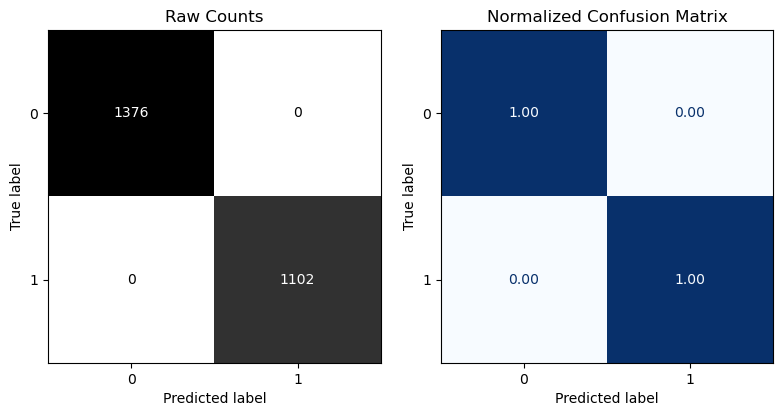

In [ ]:


print(results_dict['train']['classification_report'])
fig = results_dict['train']['confusion_matrix']
fig

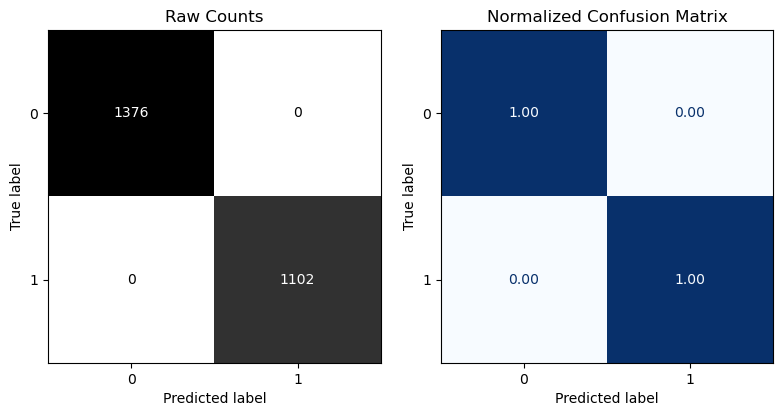

In [ ]:
results_dict['train']['confusion_matrix']

----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       492
           1       0.95      0.93      0.94       335

    accuracy                           0.96       827
   macro avg       0.96      0.95      0.95       827
weighted avg       0.96      0.96      0.96       827





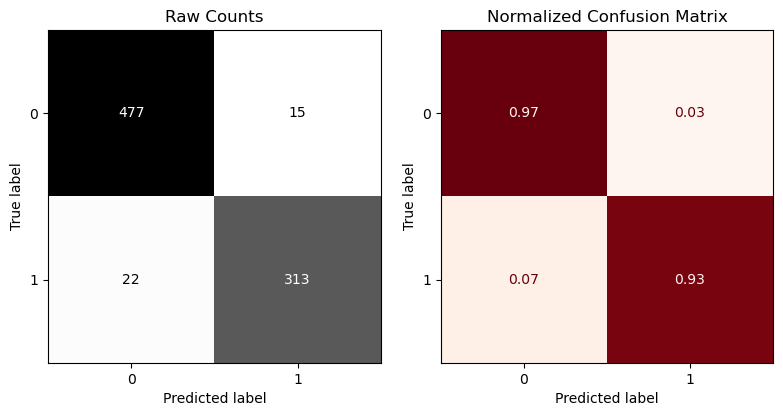

In [ ]:
print(results_dict['test']['classification_report'])
fig = results_dict['test']['confusion_matrix']
display(fig)

## Final Conclusion

The analysis of the Amazon reviews for the "Miracle Noodle Zero Carb, Gluten Free Shirataki Pasta, Spinach Angel Hair" product has provided comprehensive insights into customer preferences, sentiments, and common issues. By leveraging natural language processing techniques such as sentiment analysis with VADER and topic modeling with LDA, we have been able to identify key themes and sentiments expressed in both high and low-rating reviews.

### Key Insights:

1. **Positive Aspects**:
    - High-rating reviews frequently highlight the health benefits, flavor, and texture of the product.
    - Customers appreciate the low-calorie content and the ease of incorporating the noodles into various dishes.

2. **Negative Aspects**:
    - Low-rating reviews often mention issues with the texture, specifically describing the noodles as rubbery or slimy.
    - There are frequent complaints about the unpleasant smell upon opening the package.
    - Some customers find the preparation process challenging and not user-friendly.

3. **Sentiment Analysis**:
    - The sentiment analysis reveals a clear correlation between the star ratings and the sentiment scores. Higher star ratings correspond to more positive sentiment, while lower star ratings show more negative sentiment.
    - Text preprocessing significantly impacts sentiment scores, highlighting the importance of careful text preparation in sentiment analysis.

4. **Topic Modeling**:
    - LDA topic modeling has identified distinct themes within the reviews. High-rating reviews focus on health benefits and positive sensory experiences, while low-rating reviews highlight texture and smell issues.
    - These insights help in understanding the primary factors that influence customer satisfaction and dissatisfaction.

### Recommendations:

Based on the insights gained from the analysis, the following recommendations are proposed to improve the product and enhance customer satisfaction:

1. **Improve Texture**: Reformulate the product to address the rubbery texture, making it more similar to traditional noodles.
2. **Enhance Absorption**: Improve the noodles’ ability to absorb cooking sauces to make them more versatile and flavorful.
3. **Address Smell**: Explore ways to minimize any unpleasant odors upon opening the package.
4. **Simplify Preparation**: Provide clearer cooking instructions and consider offering pre-cooked options.
5. **Highlight Health Benefits**: Emphasize the low-calorie and healthy aspects in marketing materials to attract health-conscious customers.

By implementing these recommendations, the product can better meet customer expectations, reduce negative feedback, and reinforce positive aspects that attract loyal customers.


## Limitations & Next Steps

- To Do: apply HuggingFace sentiment classification pipelines
- To Do: return to deep NLP modeling 
- To Do: add sentiment analysis and LDA topic modeling to streamlit app.


<!-- ### For further information
Please review the narrative of our analysis in [our jupyter notebook](./index.ipynb) or review our [presentation](./SampleProjectSlides.pdf)

For any additional questions, please contact **email, email, email) -->

<!-- 
##### Repository Structure:

Here is where you would describe the structure of your repoistory and its contents, for exampe:

```

├── README.md               <- The top-level README for reviewers of this project.
├── index.ipynb             <- narrative documentation of analysis in jupyter notebook
├── presentation.pdf        <- pdf version of project presentation
└── images
    └── images               <- both sourced externally and generated from code
└── data
    └── 

``` -->